<a href="https://colab.research.google.com/github/Gabriellemga/Python_Data_Science_Alura/blob/main/Estatistica_resumindo_analisando_dados/Desafios_resumindo_analisando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [1]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [5]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [6]:
dados_uf = dados['UF'].value_counts().reset_index()

/tmp/ipython-input-2450775238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = dados_uf, y = 'UF', x = 'count', palette = 'dark:salmon')


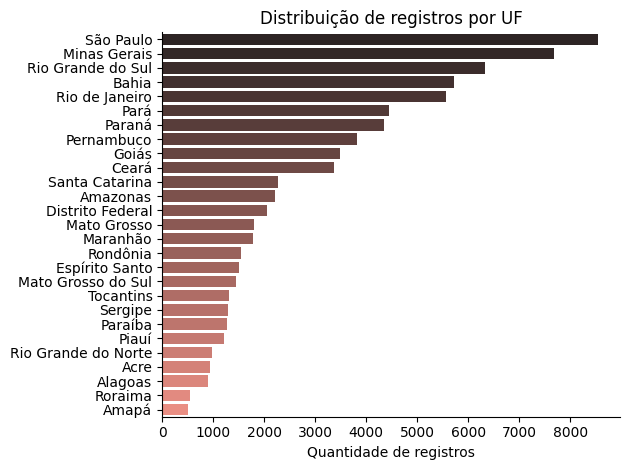

In [7]:
sns.barplot(data = dados_uf, y = 'UF', x = 'count', palette = 'dark:salmon')
plt.title('Distribuição de registros por UF')
plt.ylabel('')
plt.xlabel('Quantidade de registros')
sns.despine()
plt.tight_layout()
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [8]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [9]:
dados['Sexo_categoria'] = pd.Categorical(dados['Sexo'], categories = [0,1], ordered = True)

In [10]:
dados['Sexo_categoria'] = dados['Sexo_categoria'].map(sexo)
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria
0,Rondônia,0,23,8,12,800,1.60,Masculino
1,Rondônia,1,23,2,12,1150,1.74,Feminino
2,Rondônia,1,35,8,15,880,1.76,Feminino
3,Rondônia,0,46,2,6,3500,1.78,Masculino
4,Rondônia,1,47,8,9,150,1.69,Feminino
...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino


##### Cor

In [11]:
dados['Cor_categoria'] = pd.Categorical(dados['Cor'], categories = [0, 2, 4, 6, 8 ], ordered = True)

In [12]:
dados['Cor_categoria'] = dados['Cor_categoria'].map(cor)
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda
...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda


##### Anos de Estudo

In [13]:
dados['Anos_estudo_categoria'] = pd.Categorical(dados['Cor'], categories = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], ordered = True)

In [14]:
dados['Anos_estudo_categoria'] = dados['Anos_estudo_categoria'].map(anos_de_estudo)
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,7 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,1 ano
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,7 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,1 ano
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,7 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,1 ano
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,3 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,7 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,7 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [15]:
print(f"Tivemos Renda a partir de R$ {min(dados['Renda']):,.2f} até R$ {max(dados['Renda']):,.2f}")

Tivemos Renda a partir de R$ 0.00 até R$ 200,000.00


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [16]:
sexo_freq = (dados.groupby('Sexo_categoria', observed = False).size().reset_index(name = 'frequencia_abs').sort_values(by='Sexo_categoria', ascending=False))
sexo_freq

,Sexo_categoria,frequencia_abs
1,Feminino,23590
0,Masculino,53250


In [17]:
sexo_freq['freq_relativa'] = round((sexo_freq['frequencia_abs'] / sexo_freq['frequencia_abs'].sum()) * 100, 1)
sexo_freq

,Sexo_categoria,frequencia_abs,freq_relativa
1,Feminino,23590,30.7
0,Masculino,53250,69.3


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [18]:
freq_sexo_cor = pd.crosstab(dados['Sexo_categoria'], dados['Cor_categoria'])
freq_sexo_cor

Cor_categoria,Indígena,Branca,Preta,Amarela,Parda
Sexo_categoria,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
freq_relativ_sexo_cor = round(pd.crosstab(dados['Sexo_categoria'], dados['Cor_categoria'], normalize = 'columns') * 100,2)
freq_relativ_sexo_cor

Cor_categoria,Indígena,Branca,Preta,Amarela,Parda
Sexo_categoria,,,,,
Masculino,71.71,69.76,65.57,66.76,69.76
Feminino,28.29,30.24,34.43,33.24,30.24


> #### Conclusões

Avaliando a tabela de frequencia relativa podemos observar que a representação Feminina na categoria Indigena possui uma diferença superior a 50% entre os generos masculinos e femininos, enquanto nas outras categorias as representações apresentam valores proximos dentro do gênero e valores entre 30% e 40% de diferença entre os gêneros.

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [20]:
renda_sexo = pd.crosstab( dados['Sexo_categoria'], dados['Cor_categoria'], values = dados['Renda'], aggfunc = 'mean', dropna=True)
renda_sexo = round(renda_sexo, 2)
renda_sexo

Cor_categoria,Indígena,Branca,Preta,Amarela,Parda
Sexo_categoria,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

A análise mostra que homens possuem renda superior a mulheres, exceto na categoria Indígena cuja renda média feminina é superior. A categoria Amarela possui a maior diferença de renda entre homens e mulheres.

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [21]:
media = dados['Renda'].mean()

In [22]:
mediana = dados['Renda'].median()

In [23]:
moda = dados['Renda'].mode()

In [24]:
print(f'media: {media.round(1)} | mediana: {mediana} | moda: {moda}')

media: 2000.4 | mediana: 1200.0 | moda: 0    788
Name: Renda, dtype: int64


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [25]:
renda_estados_top_5 = dados.groupby('UF')['Renda'].mean().sort_values(ascending = False).reset_index()
renda_estados_top_5 = renda_estados_top_5.head()

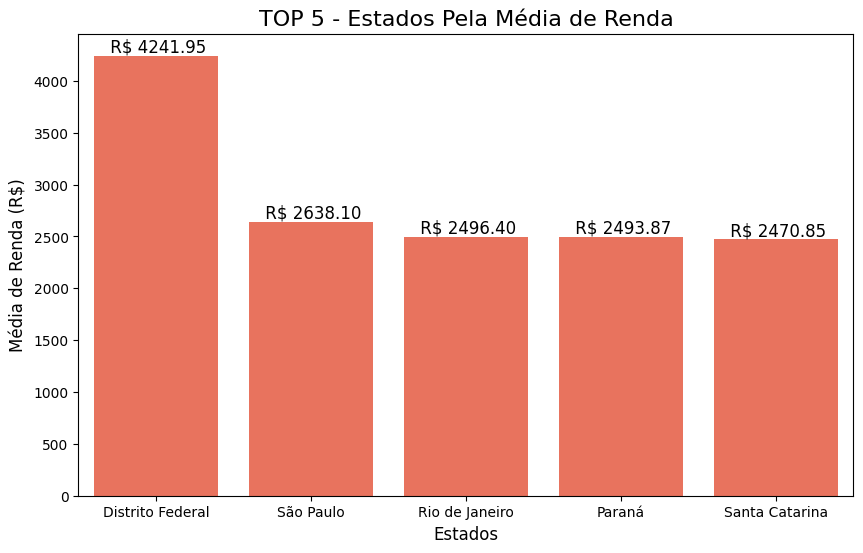

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data = renda_estados_top_5, x = 'UF', y = 'Renda',  color = '#FF6347')

plt.title('TOP 5 - Estados Pela Média de Renda', fontsize = 16)
plt.xlabel('Estados', fontsize = 12)
plt.ylabel('Média de Renda (R$)', fontsize = 12)

for index, row in renda_estados_top_5.iterrows():
    plt.text(index, row['Renda'] + 0.2, f" R$ {row['Renda']:.2f}",
             ha='center', va='bottom', fontsize=12)


plt.show()

> #### Conclusões

Distrito Federal possui a maior média de renda, com uma diferença expressiva. Os demais estados no topo são do Sudeste e Sul, indicando uma acentuada desigualdade regional e concentração econômica nessas áreas do país.

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [27]:
regiao_sudeste = ['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo']
dados_sudeste = dados[dados['UF'].isin(regiao_sudeste)]
dados_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria
31818,Minas Gerais,0,40,2,12,1600,1.62,Masculino,Branca,1 ano
31819,Minas Gerais,0,58,8,5,850,1.58,Masculino,Parda,7 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,Masculino,Parda,7 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,Masculino,Parda,7 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,Masculino,Branca,1 ano
...,...,...,...,...,...,...,...,...,...,...
55110,São Paulo,0,52,8,12,1500,1.82,Masculino,Parda,7 anos
55111,São Paulo,0,30,8,12,1500,1.48,Masculino,Parda,7 anos
55112,São Paulo,0,43,8,5,1100,1.72,Masculino,Parda,7 anos
55113,São Paulo,1,51,8,16,1600,1.75,Feminino,Parda,7 anos


##### **Média**

In [28]:
sudeste_sexo_media = pd.crosstab(dados_sudeste['Sexo_categoria'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='mean')
sudeste_sexo_media = round(sudeste_sexo_media, 2)
sudeste_sexo_media

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
Sexo_categoria,,,,
Masculino,2129.32,2283.16,2777.55,2947.74
Feminino,1752.71,1489.62,1971.53,1950.18


##### **Mediana**

In [29]:
sudeste_sexo_mediana = pd.crosstab(dados_sudeste['Sexo_categoria'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='median')
sudeste_sexo_mediana = round(sudeste_sexo_mediana, 2)
sudeste_sexo_mediana

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
Sexo_categoria,,,,
Masculino,1500.0,1400.0,1510.0,1820.0
Feminino,927.0,900.0,1040.5,1200.0


##### **Renda Máxima**

In [30]:
sudeste_sexo_max = pd.crosstab(dados_sudeste['Sexo_categoria'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='max')
sudeste_sexo_max = round(sudeste_sexo_max, 2)
sudeste_sexo_max

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
Sexo_categoria,,,,
Masculino,40000,100000,200000,80000
Feminino,100000,30000,120000,50000


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

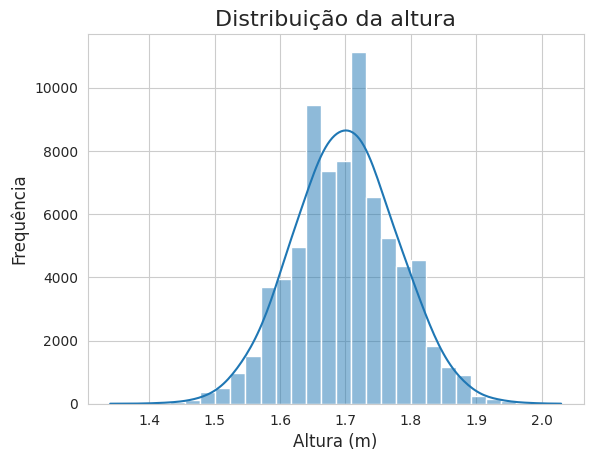

In [31]:
sns.set_style("whitegrid")
sns.histplot(bins=30, data= dados, x='Altura', kde=True, kde_kws={'bw_adjust':2})
plt.title('Distribuição da altura', fontsize = 16)
plt.xlabel('Altura (m)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.show()

In [32]:
altura_resumo = {
    'media': round(dados['Altura'].mean(),2),
    'mediana': dados['Altura'].median(),
    'moda': dados['Altura'].mode()[0]
}

altura_resumo

{'media': np.float64(1.7), 'mediana': 1.7, 'moda': np.float64(1.7)}

> #### Conclusões

Escreva suas conclusões aqui...

##### **Idade**

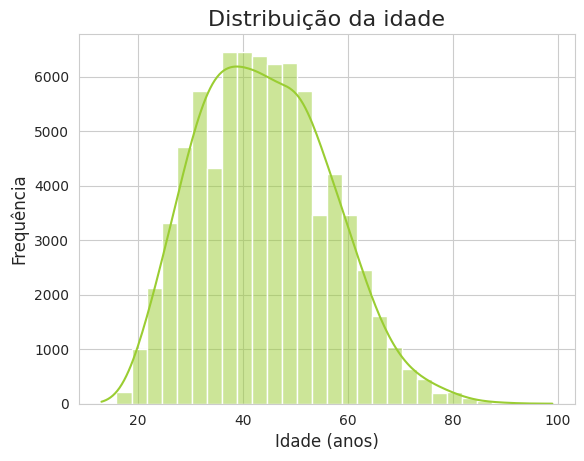

In [33]:
sns.set_style("whitegrid")
sns.histplot(bins=30, data= dados, x='Idade', kde=True, kde_kws={'bw_adjust':2}, color = '#9ACD32')
plt.title('Distribuição da idade', fontsize = 16)
plt.xlabel('Idade (anos)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.show()

In [34]:
idade_resumo = {
    'media': round(dados['Idade'].mean(),2),
    'mediana': dados['Idade'].median(),
    'moda': dados['Idade'].mode()[0]
}

idade_resumo

{'media': np.float64(44.07), 'mediana': 43.0, 'moda': np.int64(40)}

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [35]:
renda_15000 = dados[dados['Renda'] <= 15e3]
renda_15000

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,7 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,1 ano
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,7 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,1 ano
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,7 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,1 ano
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,3 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,7 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,7 anos


In [36]:
n = len(renda_15000)
n

76219

In [37]:
import math

In [38]:
k = 1 + (10/3) * math.log10(n)
k

17.273544154972114

In [39]:
k = int(k)
k

17

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [40]:
faixas_renda = renda_15000.copy()

In [41]:
faixas_renda['faixa_renda'] =  pd.cut(faixas_renda['Renda'], bins=int(k), include_lowest=True)
faixas_renda.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria,faixa_renda
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,7 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,1 ano,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,7 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,1 ano,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,7 anos,"(-15.001, 882.353]"


In [42]:
tabela_frequencias = faixas_renda.groupby('faixa_renda', observed=False ).size().reset_index(name='frequencia')
tabela_frequencias['porcentagem'] = (tabela_frequencias['frequencia'] / len(faixas_renda)) * 100
tabela_frequencias

,faixa_renda,frequencia,porcentagem
0,"(-15.001, 882.353]",26311,34.520264
1,"(882.353, 1764.706]",25816,33.870820
2,"(1764.706, 2647.059]",10905,14.307456
3,"(2647.059, 3529.412]",4854,6.368491
4,"(3529.412, 4411.765]",2133,2.798515
5,"(4411.765, 5294.118]",2180,2.860179
6,"(5294.118, 6176.471]",1002,1.314633
7,"(6176.471, 7058.824]",672,0.881670
8,"(7058.824, 7941.176]",208,0.272898
9,"(7941.176, 8823.529]",554,0.726853


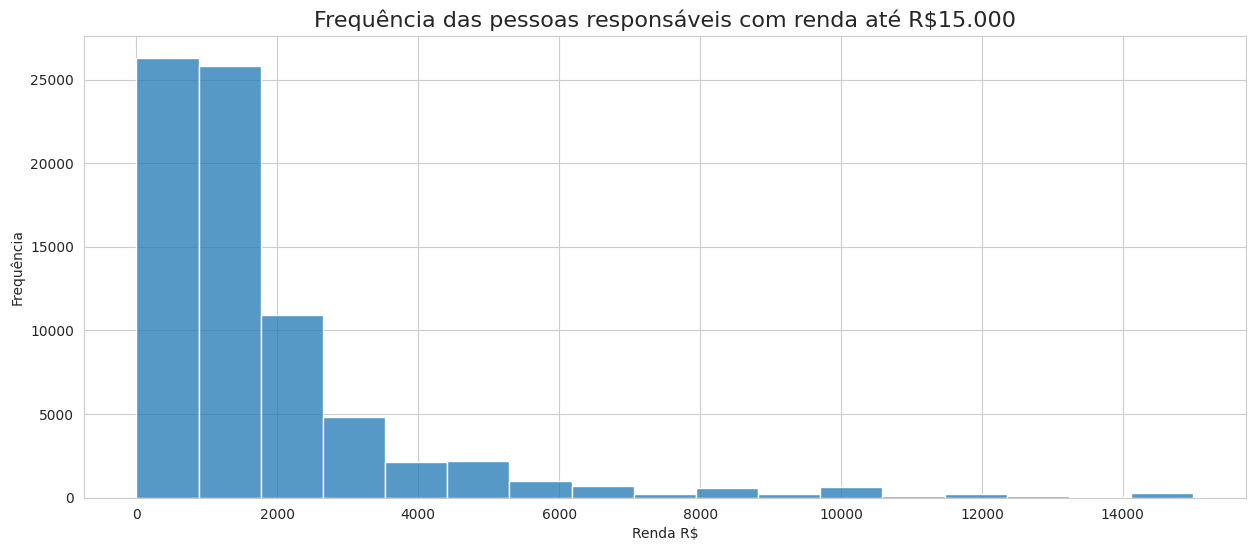

In [43]:
plt.figure(figsize = (15, 6))
sns.histplot(bins=int(k), data = faixas_renda, x='Renda')
plt.title('Frequência das pessoas responsáveis com renda até R$15.000', fontsize = 16)
plt.ylabel('Frequência')
plt.xlabel('Renda R$')
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [44]:
um_salario = dados[dados['Renda'] <= 788]
n_um_salaario = (len(um_salario)/ len(dados))*100
n_um_salaario

28.86777719937533

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [45]:
percentil_95 = dados['Renda'].quantile(0.95)
percentil_95

np.float64(6000.0)

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [46]:
percentil_99 = dados['Renda'].quantile(0.99)
percentil_99

np.float64(15000.0)

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [47]:
renda_6000 = dados[dados['Renda'] <= 6000]
renda_6000

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,7 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,1 ano
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,7 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,1 ano
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,7 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,1 ano
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,3 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,7 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,7 anos


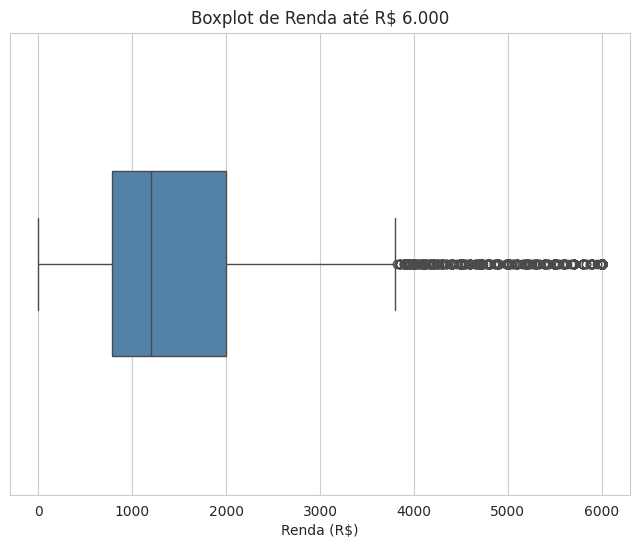

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = renda_6000['Renda'], color='steelblue')

plt.title('Boxplot de Renda até R$ 6.000')
plt.xlabel('Renda (R$)')

plt.ylim(-1, 1)

plt.show()

In [49]:
resumo_renda_6000 = {
    'Q1': renda_6000['Renda'].quantile(0.25),
    'Q2': renda_6000['Renda'].quantile(0.50),
    'Q3': renda_6000['Renda'].quantile(0.75)
}

resumo_renda_6000

{'Q1': np.float64(788.0), 'Q2': np.float64(1200.0), 'Q3': np.float64(2000.0)}

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

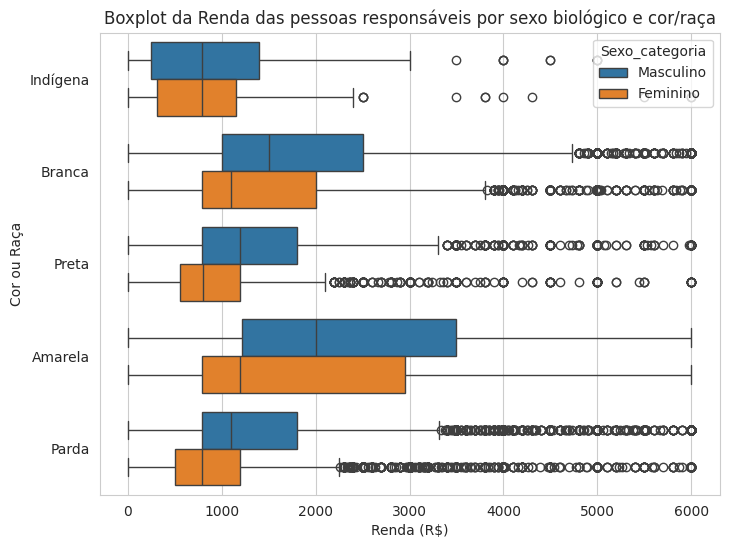

In [50]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='Cor_categoria', data=renda_6000, hue='Sexo_categoria')

plt.title('Boxplot da Renda das pessoas responsáveis por sexo biológico e cor/raça')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor ou Raça')

plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

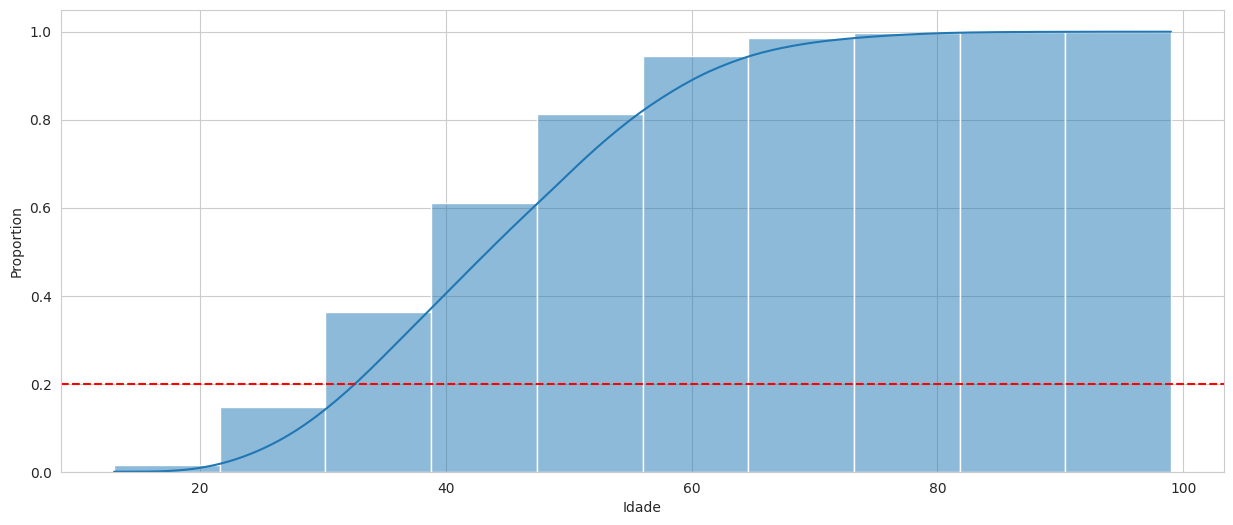

In [51]:
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')

plt.show()

In [52]:
idades_classificacao = dados.copy()

In [53]:
idades_classificacao = idades_classificacao.sort_values(by='Idade')
idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1) / len(idades_classificacao)
idades_classificacao['qualificado'] = idades_classificacao['cumulativo'] <= 0.20
idades_classificacao.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,7 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,7 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,3 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,3 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,7 anos,0.000065,True


In [54]:
idades_classificacao.tail(3)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria,cumulativo,qualificado
1789,Acre,0,95,8,9,500,1.86,Masculino,Parda,7 anos,0.999974,False
11834,Maranhão,0,97,0,1,0,1.76,Masculino,Indígena,NaN,0.999987,False
74079,Goiás,0,99,4,1,0,1.65,Masculino,Preta,3 anos,1.000000,False


In [55]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificado'] == True]
idades_qualificados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,7 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,7 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,3 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,3 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,7 anos,0.000065,True


In [56]:
len(idades_qualificados)

15368

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [57]:
estat_renda = dados['Renda'].agg(
    media='mean',
    mediana='median',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()


round(estat_renda,2)

,index,Renda
0,media,2000.38
1,mediana,1200.00
2,mad,1526.50


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [59]:
estat_renda_anos_estudo = dados.groupby('Anos_estudo_categoria', observed=False)['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
estat_renda_anos_estudo

,Anos_estudo_categoria,media,mediana,desvio_padrao
0,Sem instrução e menos de 1 ano,NaN,NaN,NaN
1,1 ano,2679.019331,1500.0,4368.165306
2,2 anos,NaN,NaN,NaN
3,3 anos,1442.294840,1000.0,1770.632912
4,4 anos,NaN,NaN,NaN
5,5 anos,4182.920455,2450.0,5219.099832
6,6 anos,NaN,NaN,NaN
7,7 anos,1513.596103,1000.0,2132.817184
8,8 anos,NaN,NaN,NaN
9,9 anos,NaN,NaN,NaN


> #### Conclusões

Escreva suas conclusões aqui...

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [60]:
estat_renda_sexo = dados[dados['Renda'] <= 15000].groupby('Sexo_categoria')['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
estat_renda_sexo

/tmp/ipython-input-1854178945.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estat_renda_sexo = dados[dados['Renda'] <= 15000].groupby('Sexo_categoria')['Renda'].agg(


,Sexo_categoria,media,mediana,desvio_padrao
0,Masculino,1964.351997,1300.0,2101.163468
1,Feminino,1460.143630,900.0,1763.686374


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [61]:
renda_10k_centro_oeste = dados[dados['UF'].isin(['Goiás', 'Distrito Federal', 'Mato Grosso', 'Mato Grosso do Sul', 'Tocantins']) & (dados['Renda'] <=10e3)]
dados_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Sexo_categoria,Cor_categoria,Anos_estudo_categoria
31818,Minas Gerais,0,40,2,12,1600,1.62,Masculino,Branca,1 ano
31819,Minas Gerais,0,58,8,5,850,1.58,Masculino,Parda,7 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,Masculino,Parda,7 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,Masculino,Parda,7 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,Masculino,Branca,1 ano
...,...,...,...,...,...,...,...,...,...,...
55110,São Paulo,0,52,8,12,1500,1.82,Masculino,Parda,7 anos
55111,São Paulo,0,30,8,12,1500,1.48,Masculino,Parda,7 anos
55112,São Paulo,0,43,8,5,1100,1.72,Masculino,Parda,7 anos
55113,São Paulo,1,51,8,16,1600,1.75,Feminino,Parda,7 anos


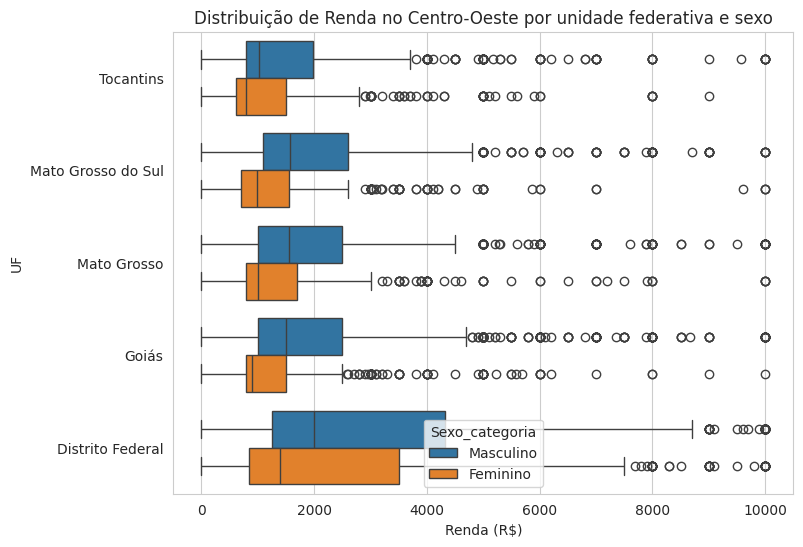

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='UF', data=renda_10k_centro_oeste, hue='Sexo_categoria')

plt.title('Distribuição de Renda no Centro-Oeste por unidade federativa e sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('UF')

plt.show()

##### **Média**

In [65]:
renda_10k_centro_oeste_media = round(pd.crosstab(renda_10k_centro_oeste['Sexo_categoria'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='mean'), 2)

renda_10k_centro_oeste_media

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
Sexo_categoria,,,,,
Masculino,3138.46,2030.06,2092.10,2181.73,1598.92
Feminino,2551.87,1284.65,1548.93,1396.69,1381.80


##### **Mediana**

In [66]:
renda_10k_centro_oeste_mediana = round(pd.crosstab(renda_10k_centro_oeste['Sexo_categoria'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='median'), 2)

renda_10k_centro_oeste_mediana

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
Sexo_categoria,,,,,
Masculino,2000.0,1500.0,1560.0,1576.0,1020.0
Feminino,1400.0,900.0,1000.0,986.0,788.0


##### **Desvio Padrão**

In [67]:
renda_10k_centro_oeste_sd = round(pd.crosstab(renda_10k_centro_oeste['Sexo_categoria'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='std'), 2)

renda_10k_centro_oeste_sd

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
Sexo_categoria,,,,,
Masculino,2513.43,1587.38,1707.91,1773.44,1632.05
Feminino,2451.17,1110.00,1508.59,1400.90,1516.37


> #### Conclusões

Escreva suas conclusões aqui...